## Import necessary libs

In [1]:
import os
# os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cuda0,floatX=float32,"
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu0,floatX=float32,"
import importlib
import random
from imp import reload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle as pkl
from analysis import auditory_analysis as aan
from analysis import sparse_analysis as san
from visualisation import plotting_funcs as plotting_funcs
from visualisation import plot_elife_aud_figs as eplot
reload(eplot)
reload(plotting_funcs)
reload(san)
reload(aan)
%matplotlib inline

## Load results and settings for plots

In [2]:
reload(aan)
res_folder_path = '/path/to/model/results.pkl'

res_path = res_folder_path + 'res_pd.pkl'
if not os.path.exists(os.path.dirname(os.path.abspath(res_path))):
    aan.postprocess_res_folder(res_folder_path, res_path)
res_pd = pd.read_pickle(res_path)
noiseless_res_pd = res_pd.query('noise_ratio==0').sort_values('final_val_cost')
res_pd = res_pd.query('noise_ratio==0.5').sort_values('final_val_cost')

In [3]:
reload(san)
sparse_folder_path = '../path/to/sparse/results.pkl'
sparse_path = sparse_folder_path + 'res_pd.pkl'
if not os.path.exists(os.path.dirname(os.path.abspath(sparse_path))):
    san.postprocess_res_folder(sparse_folder_path, sparse_path)
sparse_pd = pd.read_pickle(sparse_path)
sparse_pd = sparse_pd.sort_values('final_val_cost')


In [4]:
reload(san)
noiseless_sparse_folder_path = '../path/to/noiseless/sparse/results.pkl'
noiseless_sparse_path = noiseless_sparse_folder_path + 'res_pd.pkl'
if not os.path.exists(os.path.dirname(os.path.abspath(noiseless_sparse_path))):
    san.postprocess_res_folder(noiseless_sparse_folder_path, noiseless_sparse_path)
noiseless_sparse_pd = pd.read_pickle(noiseless_sparse_path)
noiseless_sparse_pd = noiseless_sparse_pd.sort_values('mean_ks')


In [5]:
import copy as cp
reload(quant)
reload(aan)
real_path='../path/to/real/strfs.pkl'
keys = ['f_peak_pos', 'f_peak_neg', 'f_bw_pos', 'f_bw_neg', 't_peak_pos', 't_peak_neg', 't_bw_pos', 't_bw_neg', 't_pow']
rstrfs = aan.load_real_strfs(real_path)
print(rstrfs.max())
res = quant.quantify_strfs(cp.deepcopy(rstrfs), n_h=38)
print(rstrfs.max())

d = dict(zip(keys,res))
real_measures = pd.Series(d)
print(rstrfs.shape)
reshaped_rstrfs = rstrfs.reshape([rstrfs.shape[0],rstrfs.shape[1]*rstrfs.shape[2]], order='C' )
print(reshaped_rstrfs.max())
# real_pd.t_pow = real_pd.t_pow[0]

0.0105656506494
0.0105656506494
(114, 32, 38)
0.0105656506494


In [6]:
res_entry = res_pd.query('num_hidden_units==1600 and log_reg_factor==-3.5').iloc[0]

#Choose the best overcomplete sparse coding model
sparse_entry = sparse_pd.query('neurons>=1200').sort_values('mean_ks').iloc[0]
noiseless_sparse_entry = noiseless_sparse_pd.query('neurons>=1200').sort_values('mean_ks').iloc[0]
noiseless_res_entry = noiseless_res_pd.sort_values('final_val_cost').iloc[0]
best_sparse_entry = sparse_pd.sort_values('mean_ks').iloc[0]

In [7]:
t_pow_real = real_measures.t_pow.mean(axis=0)/sum(real_measures.t_pow.mean(axis=0))
t_pow_model = res_entry.t_pow.mean(axis=0)[2:]/sum(res_entry.t_pow.mean(axis=0)[2:])
t_pow_sparse = sparse_entry.t_pow.mean(axis=0)[2:]/sum(sparse_entry.t_pow.mean(axis=0)[2:])
noiseless_t_pow_model = noiseless_res_entry.t_pow.mean(axis=0)[2:]/sum(noiseless_res_entry.t_pow.mean(axis=0)[2:])
noiseless_t_pow_sparse = noiseless_sparse_entry.t_pow.mean(axis=0)[2:]/sum(noiseless_sparse_entry.t_pow.mean(axis=0)[2:])                                                     
best_t_pow_sparse = best_sparse_entry.t_pow.mean(axis=0)[2:]/sum(best_sparse_entry.t_pow.mean(axis=0)[2:])

In [8]:
weights = aan.get_weights_from_path(res_entry.results_path)
noiseless_weights = aan.get_weights_from_path(noiseless_res_entry.results_path)
sparse_weights = san.get_weights_from_path(sparse_entry.results_path)
noiseless_sparse_weights = san.get_weights_from_path(noiseless_sparse_entry.results_path)
best_sparse_weights = san.get_weights_from_path(best_sparse_entry.results_path)

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 1080 Ti (CNMeM is disabled, cuDNN 5005)


(1600, 32, 40)
(1600, 32, 40)
(200, 32, 40)


## Perform MDS

In [9]:
Y_mds_main = aan.perform_mds([rstrfs, weights[...,2:], sparse_weights[...,2:]], n_examples=100)
Y_mds_noiseless = aan.perform_mds([rstrfs, noiseless_weights[...,2:], noiseless_sparse_weights[...,2:]], n_examples=100)
Y_mds_best_sparse = aan.perform_mds([rstrfs, weights[...,2:], best_sparse_weights[...,2:]], n_examples=100)

## Specify save folder

In [12]:
# figure_save_folder = '/path/to/save/folder/
# if not os.path.isdir(figure_save_folder):
#     os.mkdir(figure_save_folder)

## Make figures

Excluding units with 0 bw
model proportion included: 
0.736526946108
total: 167
included: 123
excluded: 44
sparse proportion included: 
0.879375
total: 1600
included: 1407
excluded: 193
real proportion included: 
1.0
total: 114
included: 114
excluded: 0
x or y>100 0 out of  114
x or y>100 1 out of  123
x or y>100 578 out of  1407
x or y>4 0 out of  114
x or y>4 0 out of  123
x or y>4 176 out of  1407


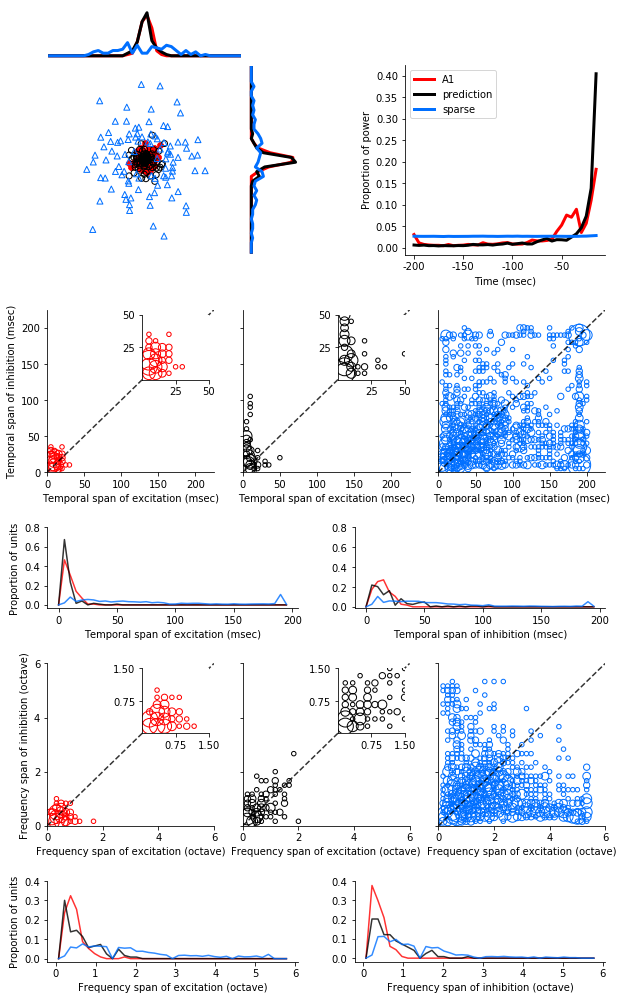

In [13]:
this_fig_name = 'Figure_3_NSR_0.5_best_overcomplete_sparse_heatmap_insets'
# this_save_path = figure_save_folder + this_fig_name
eplot.plot_quant_aud_figure(weights, sparse_weights, rstrfs, Y_mds_main, 
                            t_pow_real, t_pow_model, t_pow_sparse,save_path=None, use_blobs=True)
# eplot.plot_quant_aud_figure(weights, sparse_weights, rstrfs, Y_mds_main, 
#                             t_pow_real, t_pow_model, t_pow_sparse,save_path=this_save_path, use_blobs=True)

Excluding units with 0 bw
model proportion included: 
0.913978494624
total: 465
included: 425
excluded: 40
sparse proportion included: 
0.908125
total: 1600
included: 1453
excluded: 147
real proportion included: 
1.0
total: 114
included: 114
excluded: 0
x or y>100 0 out of  114
x or y>100 0 out of  425
x or y>100 405 out of  1453
x or y>4 0 out of  114
x or y>4 0 out of  425
x or y>4 56 out of  1453


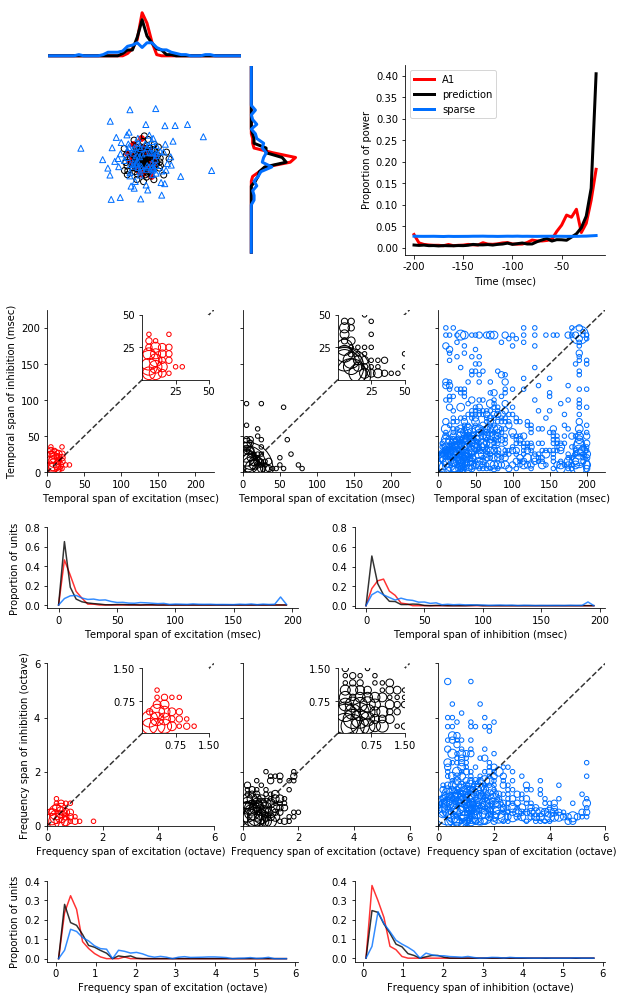

In [14]:
this_fig_name = 'Figure_6_noiseless_heatmap_insets'
# this_save_path = figure_save_folder + this_fig_name
eplot.plot_quant_aud_figure(noiseless_weights, noiseless_sparse_weights, rstrfs, Y_mds_noiseless,
                            t_pow_real, t_pow_model, t_pow_sparse,save_path=None, use_blobs=True)
# eplot.plot_quant_aud_figure(noiseless_weights, noiseless_sparse_weights, rstrfs, Y_mds_noiseless,
#                             t_pow_real, t_pow_model, t_pow_sparse,save_path=this_save_path, use_blobs=True)

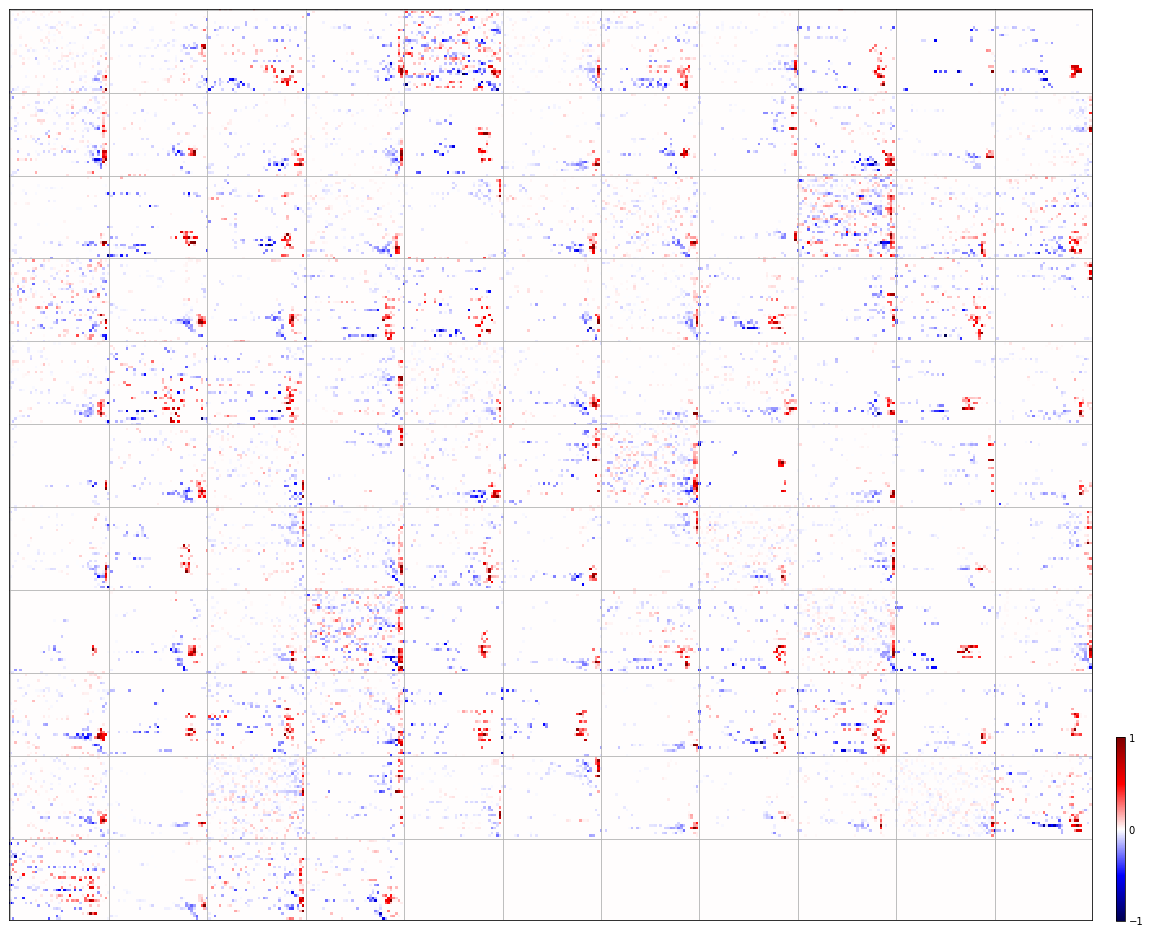

In [15]:
fig_name = 'supp_fig_real_aud_strfs'
reload(aan)
fig = plt.figure(figsize=[20,20])
gs = plt.GridSpec(100,100)
ax = fig.add_subplot(gs[:,:-3])
[ax,im] = aan.plot_real_strfs(rstrfs, ax=ax)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.tick_params('both', length=0, width=0, which='major')
cax = fig.add_subplot(gs[-25:-8,-1:])
cbar = plt.colorbar(im,cax=cax)
cbar.set_ticks([-1,0,1])
cax.tick_params('both', length=0, width=0, which='major')

# fig.savefig(os.path.join(figure_save_folder,fig_name+'.svg'))


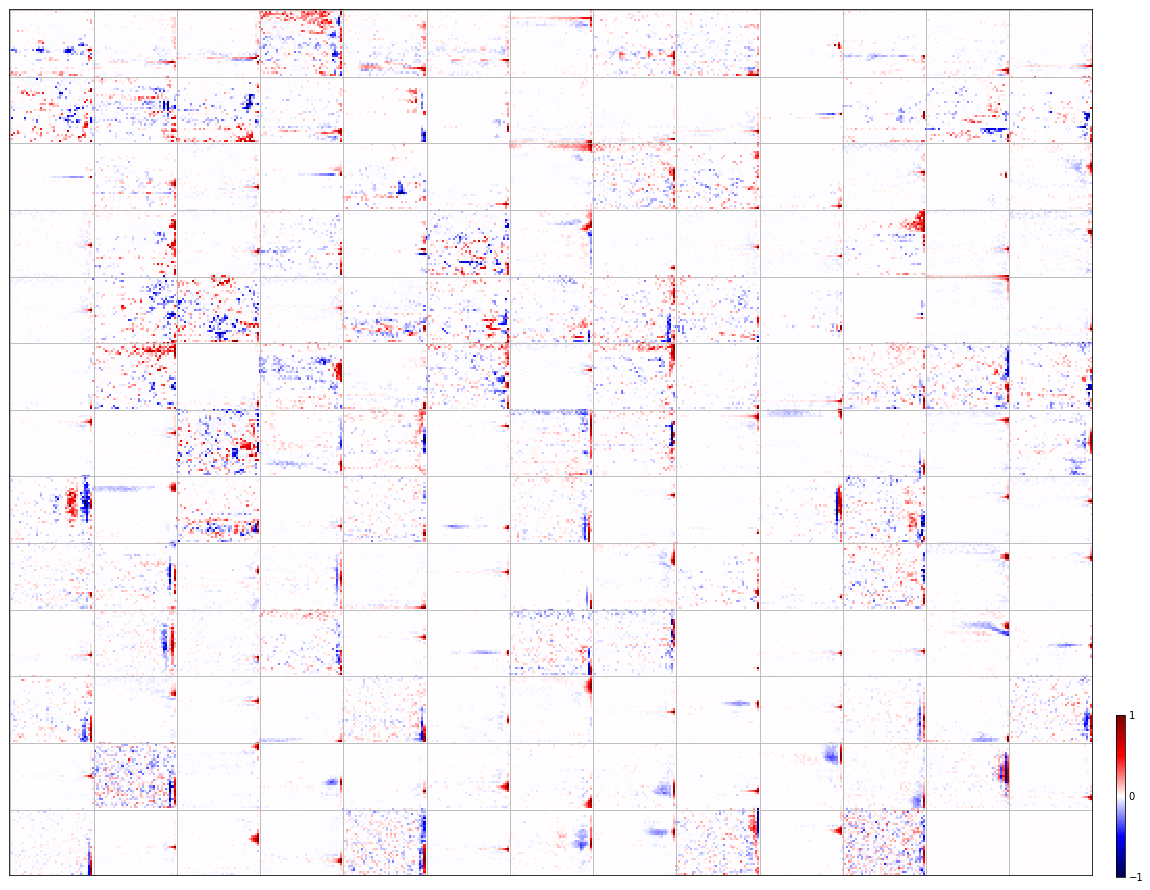

In [16]:
reload(quant)
fig_name = 'supp_fig_all_aud_strfs_NSR_0.5_200ms'
keep_prop=0.01
pth = res_entry.results_path
# print(pth)
pred_net = pkl.load(open(pth, 'rb'))
if not isinstance(pred_net, dict):
    network_params  = pred_net.network_params
    cost_history = pred_net.cost_history
else:
    network_params = pred_net['network_params']
    cost_history = pred_net['cost_history']
        
reload(aan)
fig = plt.figure(figsize=[20,20])
gs = plt.GridSpec(100,100)
ax = fig.add_subplot(gs[:,:-3])
[ax,im] = aan.plot_these_aud_weights(network_params, keep_prop=keep_prop, ax=ax, half_t=False)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.tick_params('both', length=0, width=0, which='major')
cax = fig.add_subplot(gs[-25:-10,-1:])
cbar = plt.colorbar(im,cax=cax)
cbar.set_ticks([-1,0,1])
cax.tick_params('both', length=0, width=0, which='major')

# fig.savefig(os.path.join(figure_save_folder,fig_name+'.svg'))

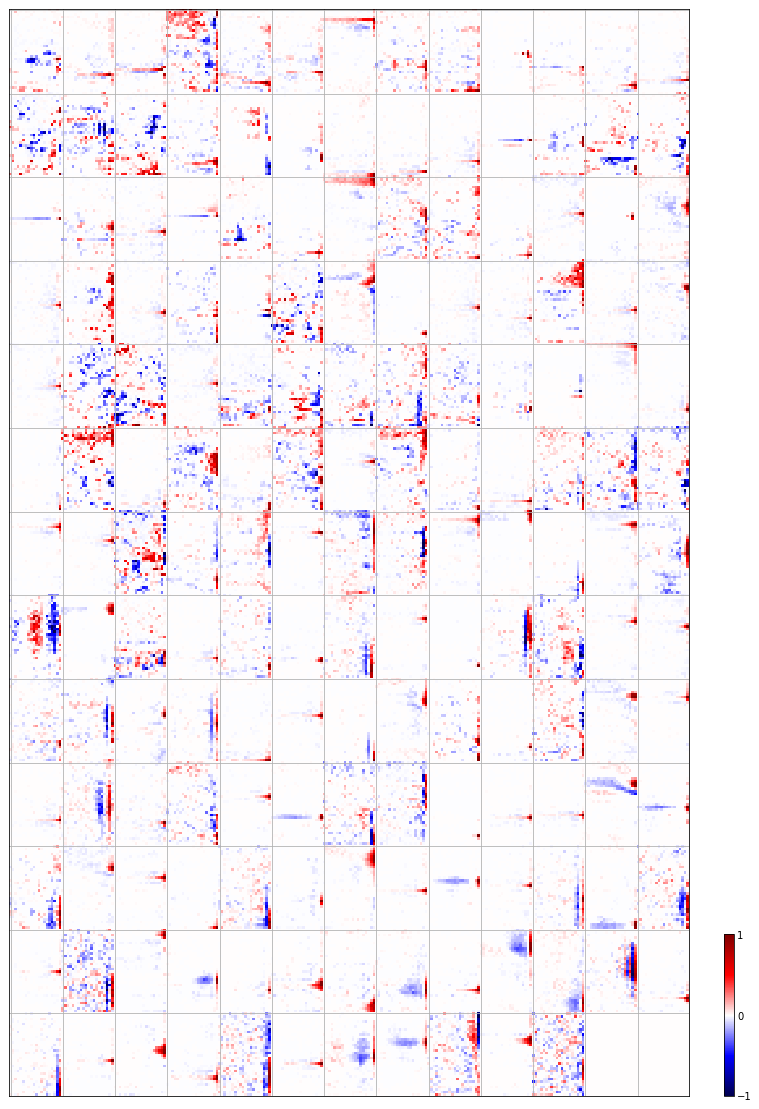

In [17]:
reload(quant)
fig_name = 'supp_fig_1_all_aud_strfs_NSR_0.5_100ms'
keep_prop=0.01
pth = res_entry.results_path
# print(pth)
# pth = nh_lam_pd.sort_values('final_val_cost').iloc[0]['results_path']
pred_net = pkl.load(open(pth, 'rb'))
if not isinstance(pred_net, dict):
    network_params  = pred_net.network_params
    cost_history = pred_net.cost_history
else:
    network_params = pred_net['network_params']
    cost_history = pred_net['cost_history']
            
reload(aan)
fig = plt.figure(figsize=[20,20])
gs = plt.GridSpec(100,100)
ax = fig.add_subplot(gs[:,:-3])
[ax,im] = aan.plot_these_aud_weights(network_params, keep_prop=keep_prop, ax=ax, half_t=True)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.tick_params('both', length=0, width=0, which='major')
cax = fig.add_subplot(gs[-15:,-18:-17])
cbar = plt.colorbar(im,cax=cax)
cbar.set_ticks([-1,0,1])
cax.tick_params('both', length=0, width=0, which='major')

# fig.savefig(os.path.join(figure_save_folder,fig_name+'.svg'))

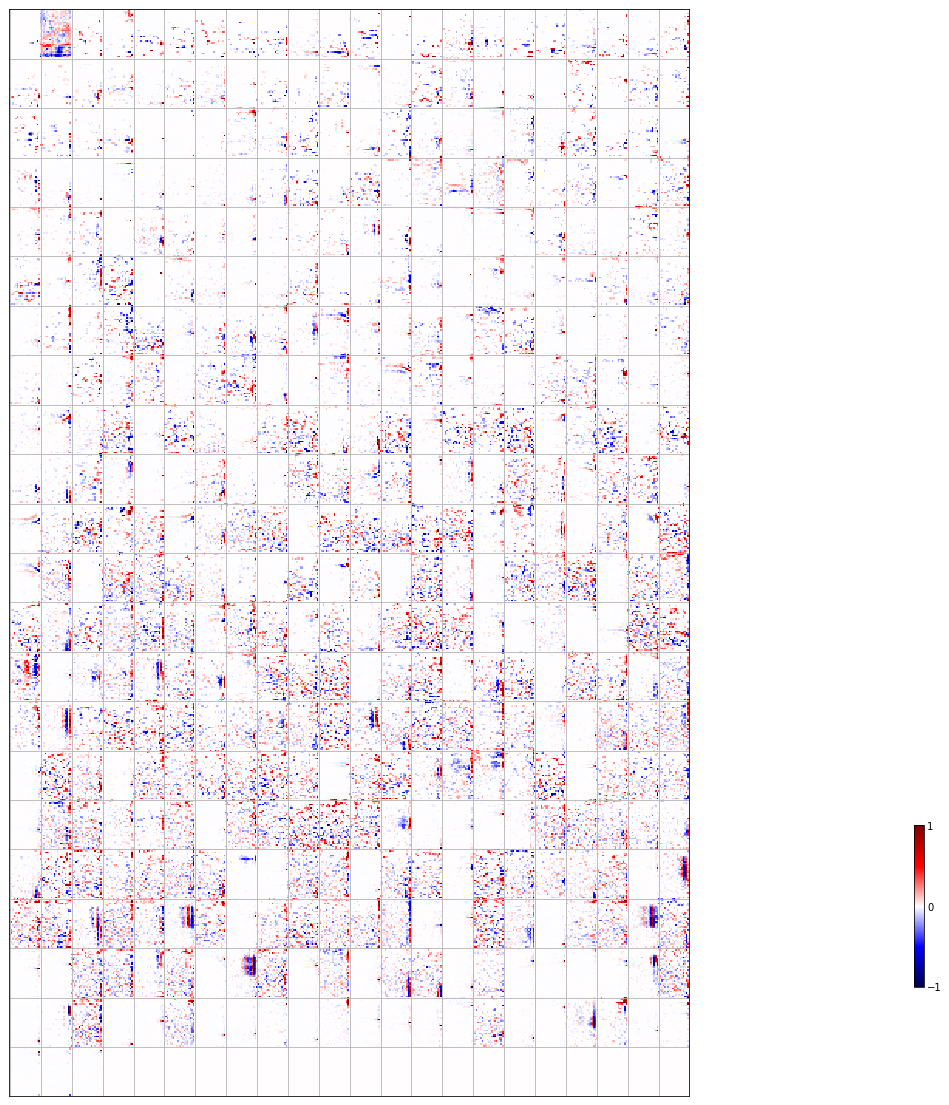

In [18]:
reload(quant)
fig_name = 'supp_fig_all_aud_strfs_without_noise_100ms'
keep_prop=0.01
pth = noiseless_res_entry.results_path
# print(pth)
# pth = nh_lam_pd.sort_values('final_val_cost').iloc[0]['results_path']
pred_net = pkl.load(open(pth, 'rb'))
if not isinstance(pred_net, dict):
    network_params  = pred_net.network_params
    cost_history = pred_net.cost_history
else:
    network_params = pred_net['network_params']
    cost_history = pred_net['cost_history']
            
# weights = network_params[0].T
# l2_norm = np.sum(weights**2,axis=1)
# keep_ix = l2_norm>keep_prop*max(l2_norm)
# weights = weights[keep_ix,:]
# num_mstrfs = weights.shape[0]
# weights =np.reshape(weights,[num_mstrfs, 40, 32])
# weights= np.rollaxis(weights,2,1)

# old_weights = weights

reload(aan)
fig = plt.figure(figsize=[20,20])
gs = plt.GridSpec(100,100)
ax = fig.add_subplot(gs[:,:-3])
[ax,im] = aan.plot_these_aud_weights(network_params, keep_prop=keep_prop, ax=ax, half_t=True)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.tick_params('both', length=0, width=0, which='major')
cax = fig.add_subplot(gs[-25:-10,-1:])
cbar = plt.colorbar(im,cax=cax)
cbar.set_ticks([-1,0,1])
cax.tick_params('both', length=0, width=0, which='major')

# fig.savefig(os.path.join(figure_save_folder,fig_name+'.svg'))

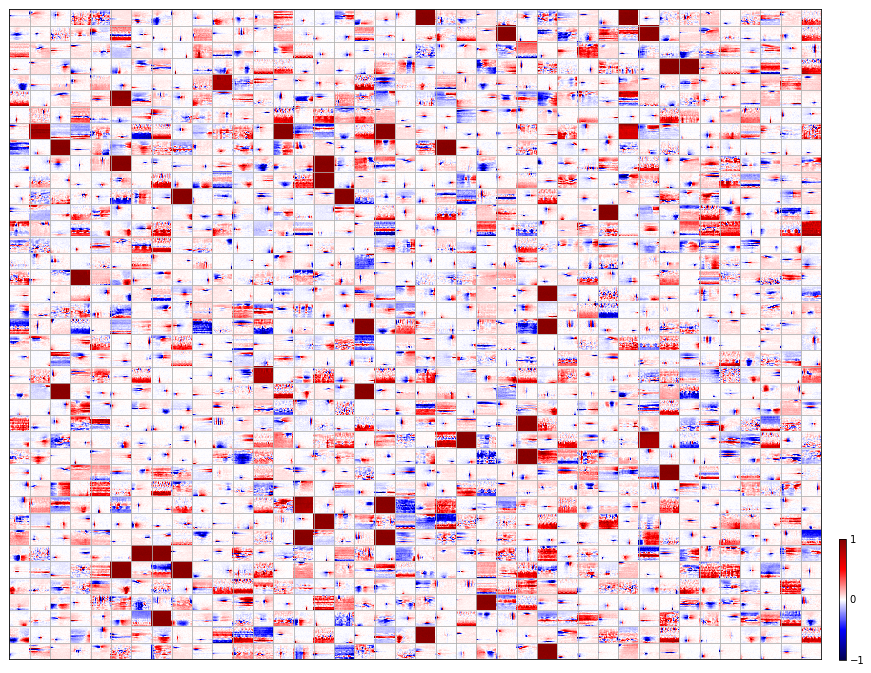

In [19]:
fig_name = 'supp_fig_all_sparse_strfs_best_overcomplete_without_noise'
reload(san)
this_res_path = noiseless_sparse_entry.results_path
# print(this_res_path)
Phi = san.load_pickled_data(this_res_path)['Phi']
fig = plt.figure(figsize=[15,15])
gs = plt.GridSpec(100,100)
ax = fig.add_subplot(gs[:,:-3])
[ax,im] = san.plot_these_sparse_weights(Phi, keep_prop=0.001, ax=ax)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.tick_params('both', length=0, width=0, which='major')
cax = fig.add_subplot(gs[-25:-10,-1:])
cbar = plt.colorbar(im,cax=cax)
cbar.set_ticks([-1,0,1])
cax.tick_params('both', length=0, width=0, which='major')
# fig.savefig(os.path.join(figure_save_folder,fig_name+'.svg'))

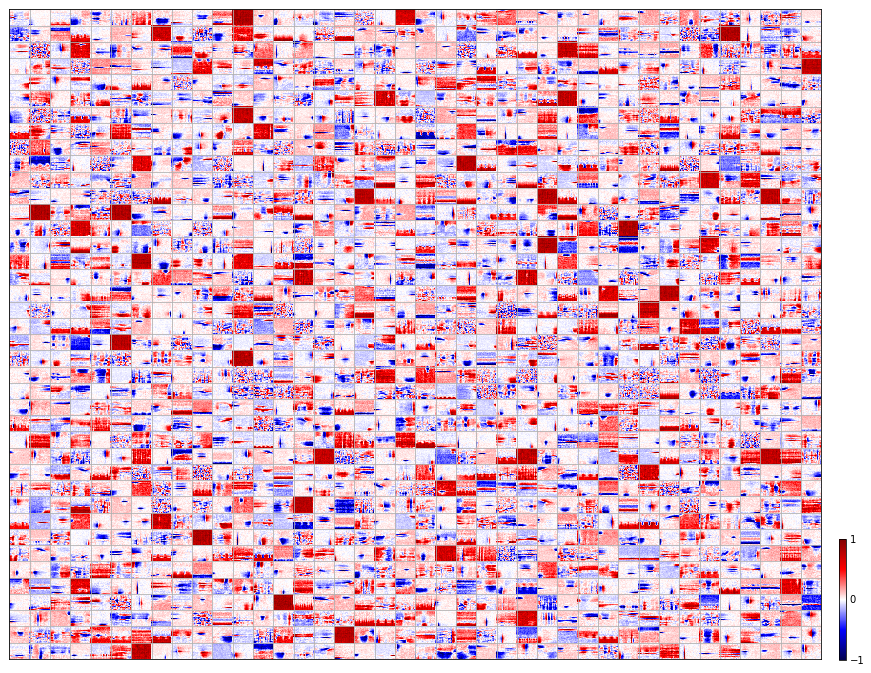

In [21]:
fig_name = 'supp_fig_all_sparse_strfs_best_overcomplete_with_0.5_noise'
reload(san)
this_res_path = sparse_entry.results_path
Phi = san.load_pickled_data(this_res_path)['Phi']
fig = plt.figure(figsize=[15,15])
gs = plt.GridSpec(100,100)
ax = fig.add_subplot(gs[:,:-3])
[ax,im] = san.plot_these_sparse_weights(Phi, keep_prop=0.001, ax=ax)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.tick_params('both', length=0, width=0, which='major')
cax = fig.add_subplot(gs[-25:-10,-1:])
cbar = plt.colorbar(im,cax=cax)
cbar.set_ticks([-1,0,1])
cax.tick_params('both', length=0, width=0, which='major')
# fig.savefig(os.path.join(figure_save_folder,fig_name+'.svg'))

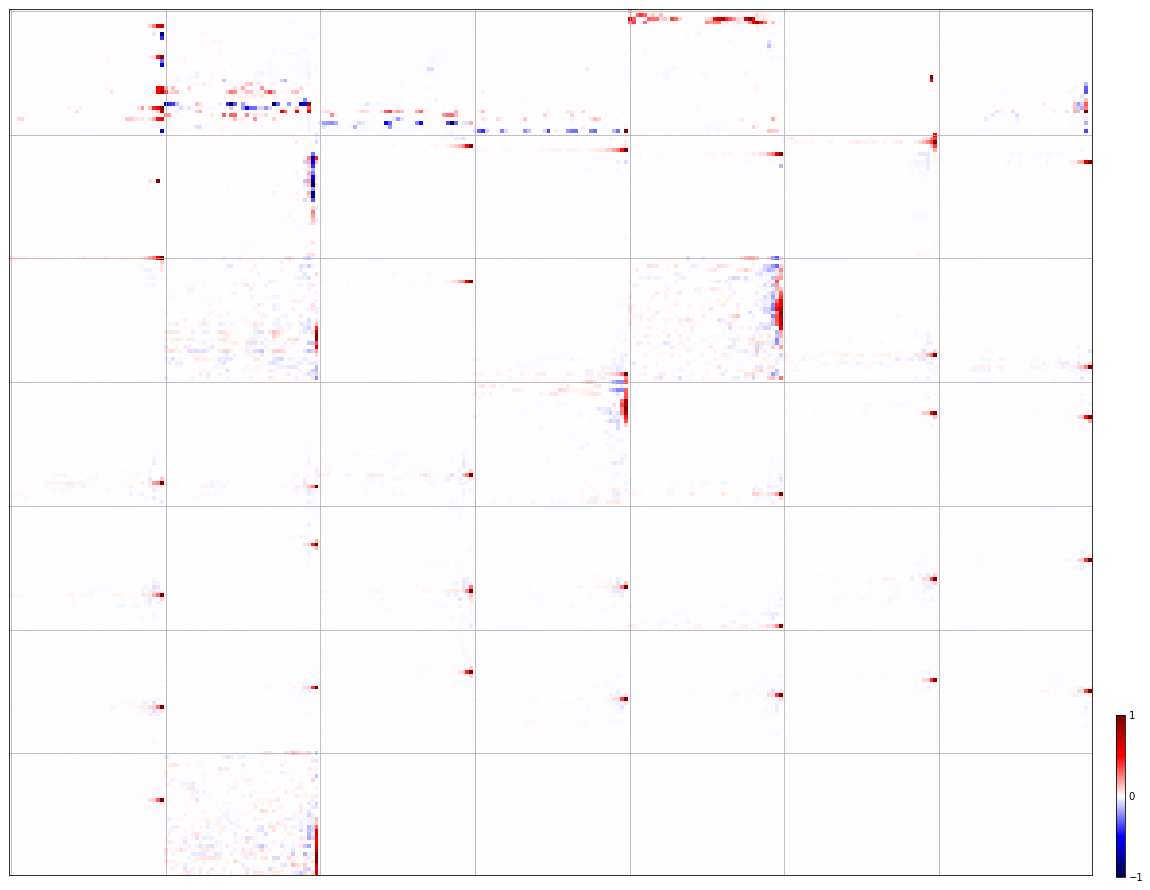

In [24]:
reload(quant)
fig_name = 'supp_fig_linear_no_noise_200ms'
keep_prop=0.01
pth = noiseless_res_pd.loc[noiseless_res_pd['nonlinearity']=='linear'].sort_values('final_val_cost').iloc[0].results_path

# print(pth)
pred_net = pkl.load(open(pth, 'rb'))
if not isinstance(pred_net, dict):
    network_params  = pred_net.network_params
    cost_history = pred_net.cost_history
else:
    network_params = pred_net['network_params']
    cost_history = pred_net['cost_history']

reload(aan)
fig = plt.figure(figsize=[20,20])
gs = plt.GridSpec(100,100)
ax = fig.add_subplot(gs[:,:-3])
[ax,im] = aan.plot_these_aud_weights(network_params, keep_prop=keep_prop, ax=ax, half_t=False)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.tick_params('both', length=0, width=0, which='major')
cax = fig.add_subplot(gs[-25:-10,-1:])
cbar = plt.colorbar(im,cax=cax)
cbar.set_ticks([-1,0,1])
cax.tick_params('both', length=0, width=0, which='major')

# fig.savefig(os.path.join(figure_save_folder,fig_name+'.svg'))

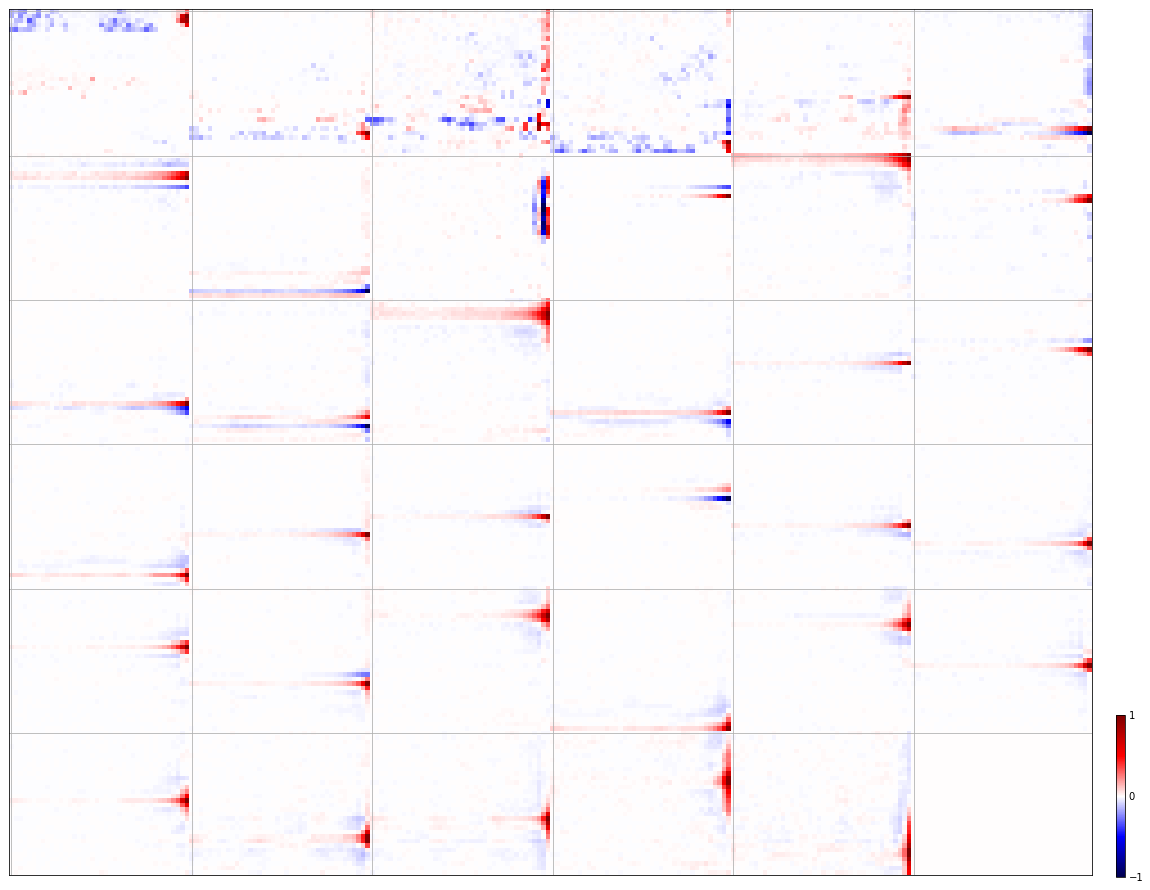

In [26]:
reload(quant)
fig_name = 'supp_fig_linear_NSR_0.5_200ms'
keep_prop=0.01
pth = res_pd.loc[res_pd['nonlinearity']=='linear'].sort_values('final_val_cost').iloc[0].results_path

# print(pth)
pred_net = pkl.load(open(pth, 'rb'))
if not isinstance(pred_net, dict):
    network_params  = pred_net.network_params
    cost_history = pred_net.cost_history
else:
    network_params = pred_net['network_params']
    cost_history = pred_net['cost_history']
            
linear_weights = network_params[0].T
l2_norm = np.sum(linear_weights**2,axis=1)
keep_ix = l2_norm>keep_prop*max(l2_norm)
linear_weights = linear_weights[keep_ix,:]
num_lstrfs = linear_weights.shape[0]
linear_weights =np.reshape(linear_weights,[num_lstrfs, 40, 32])
linear_weights= np.rollaxis(linear_weights,2,1)

# old_weights = weights

reload(aan)
fig = plt.figure(figsize=[20,20])
gs = plt.GridSpec(100,100)
ax = fig.add_subplot(gs[:,:-3])
[ax,im] = aan.plot_these_aud_weights(network_params, keep_prop=keep_prop, ax=ax, half_t=False)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.tick_params('both', length=0, width=0, which='major')
cax = fig.add_subplot(gs[-25:-10,-1:])
cbar = plt.colorbar(im,cax=cax)
cbar.set_ticks([-1,0,1])
cax.tick_params('both', length=0, width=0, which='major')

# fig.savefig(os.path.join(figure_save_folder,fig_name+'.svg'))

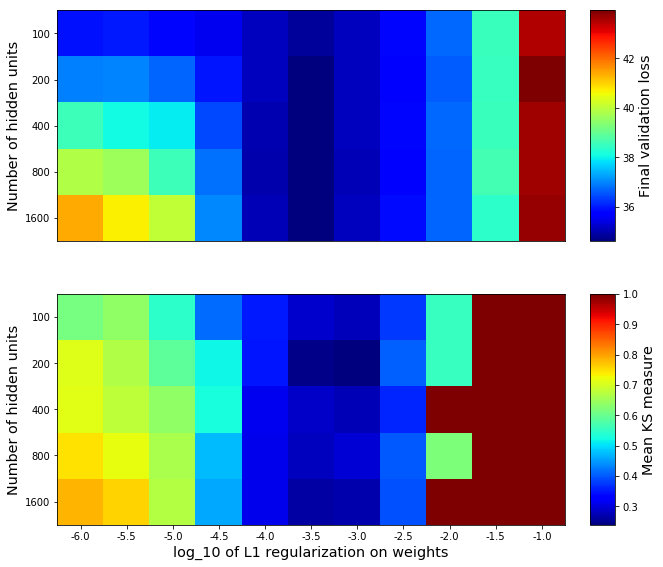

In [29]:
fig_name = 'Figure_5'
reload(aan)
fig = plt.figure(figsize=[10,10])
gs = plt.GridSpec(4,3)
ax_0 = fig.add_subplot(gs[:2,:])
ax_1 = fig.add_subplot(gs[2:,:])

reload(aan)
ax_labels = [ 'log_10 of L1 regularization on weights', 'Number of hidden units','Final validation loss']
validation_cost_grid_im = aan.plot_3D_info_grid(res_pd.loc[res_pd['nonlinearity']=='sigmoid'].query('noise_ratio==0.5 and num_hidden_units>10').query('log_reg_factor == -6 or log_reg_factor == -5.5 or log_reg_factor == -5 or log_reg_factor == -4.5 or log_reg_factor == -4 or log_reg_factor == -3.5 or log_reg_factor == -3 or log_reg_factor == -2.5 or log_reg_factor == -2 or log_reg_factor == -1.5 or log_reg_factor == -1'), 'num_hidden_units', 'log_reg_factor', 'final_val_cost', ax=ax_0,ax_labels=ax_labels)

ax_labels = [ 'log_10 of L1 regularization on weights', 'Number of hidden units','Mean KS measure']
ks_cost_grid_im = aan.plot_3D_info_grid(res_pd.loc[res_pd['nonlinearity']=='sigmoid'].query('noise_ratio==0.5 and num_hidden_units>10').query('log_reg_factor == -6 or log_reg_factor == -5.5 or log_reg_factor == -5 or log_reg_factor == -4.5 or log_reg_factor == -4 or log_reg_factor == -3.5 or log_reg_factor == -3 or log_reg_factor == -2.5 or log_reg_factor == -2 or log_reg_factor == -1.5 or log_reg_factor == -1'), 'num_hidden_units', 'log_reg_factor', 'mean_ks', ax=ax_1,ax_labels=ax_labels)

ax_0.set_xticks([])
ax_0.set_xlabel('')
# fig.savefig(os.path.join(figure_save_folder,fig_name+'.svg'))

In [32]:
fig_name = 'supp_fig_7'
reload(aan)
fig = plt.figure(figsize=[10,10])
gs = plt.GridSpec(4,3)
ax_0 = fig.add_subplot(gs[:2,:])
ax_1 = fig.add_subplot(gs[2:,:])
ax_labels = [ 'log_10 of L1 regularization on activities', 'Number of hidden units','Final validation loss']
validation_cost_grid_im = aan.plot_3D_info_grid(sparse_pd, 'neurons', 'log_lambdav', 'final_val_cost', ax=ax_0,ax_labels=ax_labels)

ax_labels = [ 'log_10 of L1 regularization on activities', 'Number of hidden units','Mean KS measure']
ks_cost_grid_im = aan.plot_3D_info_grid(sparse_pd, 'neurons', 'log_lambdav', 'mean_ks', ax=ax_1, ax_labels=ax_labels)

ax_0.set_xticks([])
ax_0.set_xlabel('')
# fig.savefig(os.path.join(figure_save_folder,fig_name+'.svg'))

In [30]:
import scipy

In [31]:
[x,p] = scipy.stats.pearsonr(validation_cost_grid_im.flatten(), ks_cost_grid_im.flatten())
print(x)
print(p)
n = len(validation_cost_grid_im.flatten())
print(n)

0.803381804694
1.57016332172e-13
55


In [33]:
fig_name = 'supp_fig_7_noiseless_sparse'
reload(aan)
fig = plt.figure(figsize=[10,10])
gs = plt.GridSpec(4,3)
ax_0 = fig.add_subplot(gs[:2,:])
ax_1 = fig.add_subplot(gs[2:,:])
ax_labels = [ 'log_10 of L1 regularization on activities', 'Number of hidden units','Final validation loss']
validation_cost_grid_im = aan.plot_3D_info_grid(noiseless_sparse_pd, 'neurons', 'log_lambdav', 'final_val_cost', ax=ax_0,ax_labels=ax_labels)

ax_labels = [ 'log_10 of L1 regularization on activities', 'Number of hidden units','Mean KS measure']
ks_cost_grid_im = aan.plot_3D_info_grid(noiseless_sparse_pd, 'neurons', 'log_lambdav', 'mean_ks', ax=ax_1, ax_labels=ax_labels)

ax_0.set_xticks([])
ax_0.set_xlabel('')
# fig.savefig(os.path.join(figure_save_folder,fig_name+'.svg'))

In [34]:
[x,p] = scipy.stats.pearsonr(validation_cost_grid_im.flatten(), ks_cost_grid_im.flatten())
print(x)
print(p)
n = len(validation_cost_grid_im.flatten())
print(n)

0.243355247803
0.0885746795773
50
